In [1]:
import numpy as np
import pandas as pd 
import missingno as msno
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importation des données du traning set
data_train = pd.read_csv('application_train.csv')
print('Les dimensions du data training : ', data_train.shape)
data_train.head()

Les dimensions du data training :  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Importation des données du testing set
data_test = pd.read_csv('application_test.csv')
print('Les dimensions du data testing : ',data_test.shape)
data_test.head()

Les dimensions du data testing :  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
aaa = data_train.select_dtypes(include=['object']).dtypes
print(len(aaa))
aaa

16


NAME_CONTRACT_TYPE            object
CODE_GENDER                   object
FLAG_OWN_CAR                  object
FLAG_OWN_REALTY               object
NAME_TYPE_SUITE               object
NAME_INCOME_TYPE              object
NAME_EDUCATION_TYPE           object
NAME_FAMILY_STATUS            object
NAME_HOUSING_TYPE             object
OCCUPATION_TYPE               object
WEEKDAY_APPR_PROCESS_START    object
ORGANIZATION_TYPE             object
FONDKAPREMONT_MODE            object
HOUSETYPE_MODE                object
WALLSMATERIAL_MODE            object
EMERGENCYSTATE_MODE           object
dtype: object

In [6]:
data_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

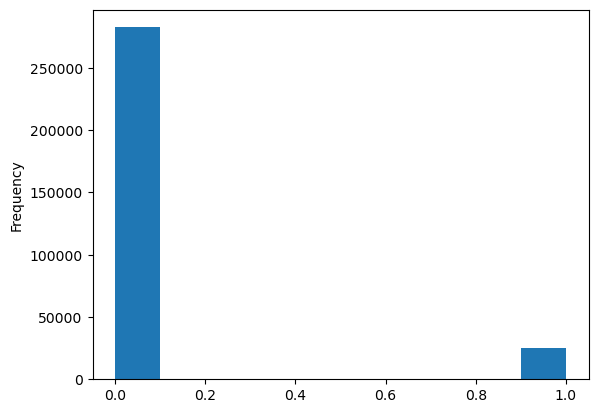

In [7]:
data_train['TARGET'].plot.hist();

#### Examinons la colonne cible (Target) à prédire : 0 pour le prêt remboursé et 1 pour les prêts en difficulté de remboursement

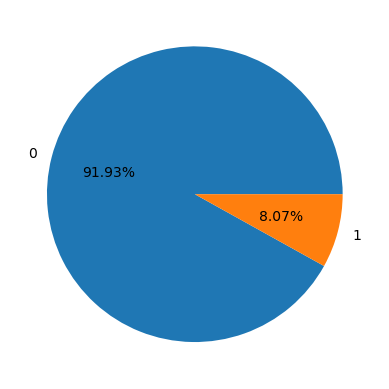

In [8]:
tar = (data_train['TARGET'].value_counts())/len(data_train)
plt.pie(tar,labels=tar.index, autopct='%.2f%%')# Diagramme en secteurs
plt.show()

### La vue des valeurs manquantes dans le traning set

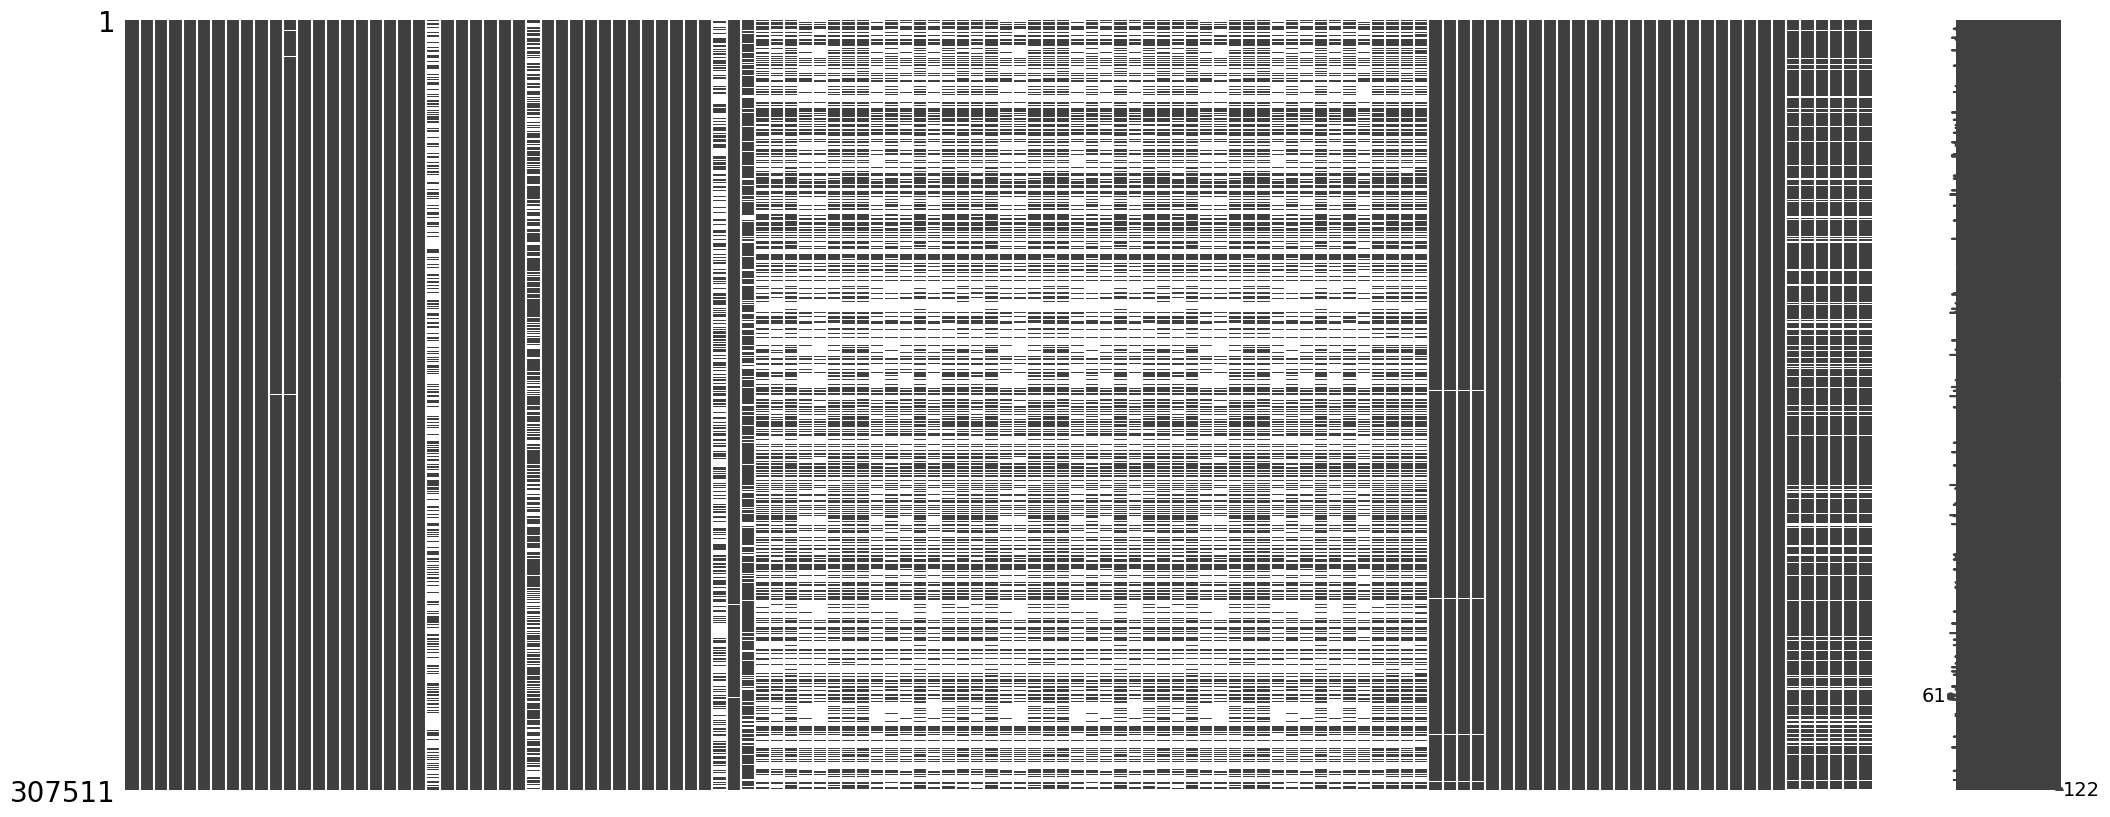

In [9]:
msno.matrix(data_train);

In [6]:
# Création d'un tableau des valeurs manquantes par colonnes
miss = data_train.isnull().sum()
miss_pourcent = (100 * data_train.isnull().sum() / len(data_train)).round(2)
TableManq= pd.concat([miss, miss_pourcent], axis=1)
TableManq.columns  = ['Nbr_Val_Manq','%Val_manq']
TableManq.sort_values(by='%Val_manq', ascending=False)

,Nbr_Val_Manq,%Val_manq
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_AVG,213514,69.43
...,...,...
NAME_FAMILY_STATUS,0,0.00
NAME_EDUCATION_TYPE,0,0.00
NAME_INCOME_TYPE,0,0.00
AMT_ANNUITY,12,0.00


In [7]:
Tab_Col_Manq = TableManq.loc[TableManq['Nbr_Val_Manq'] > 0 ]
print('Le nombre de colonnes comportants des valeurs manquantes est de : '+ str(Tab_Col_Manq.shape[0]))
Tab_Col_Manq

Le nombre de colonnes comportants des valeurs manquantes est de : 67


,Nbr_Val_Manq,%Val_manq
AMT_ANNUITY,12,0.00
AMT_GOODS_PRICE,278,0.09
NAME_TYPE_SUITE,1292,0.42
OWN_CAR_AGE,202929,65.99
OCCUPATION_TYPE,96391,31.35
...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.50
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.50
AMT_REQ_CREDIT_BUREAU_MON,41519,13.50
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.50


In [8]:
Tab_Col_Plein = TableManq.loc[TableManq['Nbr_Val_Manq'] == 0 ]
print('Le nombre de colonnes ayant 0 (zero) valeur manquante est de : '+ str(Tab_Col_Plein.shape[0]))
Tab_Col_Plein.head(5)

Le nombre de colonnes ayant 0 (zero) valeur manquante est de : 55


,Nbr_Val_Manq,%Val_manq
SK_ID_CURR,0,0.0
TARGET,0,0.0
NAME_CONTRACT_TYPE,0,0.0
CODE_GENDER,0,0.0
FLAG_OWN_CAR,0,0.0


### Encodage d' etiquettes et encodage One-Hot création des colonnes factices  (convertion des features 

In [10]:
# Création de l'encodeur d'étiquette
le = LabelEncoder()
le_count = 0

for col in data_train:
    if data_train[col].dtype == 'object':
        # S'il y a 2 catégories uniques ou moins
        if len(list(data_train[col].unique())) <= 2:
            # Entrainement de jeu de données
            le.fit(data_train[col])
            # Tranformation des 2 jeu de données
            data_train[col] = le.transform(data_train[col])
            data_test[col] = le.transform(data_test[col])
            
            # Enregistrer le nombre de colonnes dont les étiquettes ont été codées
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [11]:
# encodage à chaud des variables catégorielles
data_train = pd.get_dummies(data_train)
data_test = pd.get_dummies(data_test)

print("Les dimensions des features training: ", data_train.shape)
print('Les dimensions des features testing ', data_test.shape)

Les dimensions des features training:  (307511, 243)
Les dimensions des features testing  (48744, 239)


### Alignement des données du training set et de testing set

In [12]:
train_labels = data_train['TARGET']

# Alignez les données de formation et de test, ne conservez que les colonnes présentes dans les deux dataframes
data_train, data_test = data_train.align(data_test, join = 'inner', axis = 1)

# Ajoutez la cible
data_train['TARGET'] = train_labels
data = data_train
data_test.to_csv('data_test0.csv', index=False)
data.to_csv('data0.csv', index=False) 
print("Les dimensions des features training: ", data_train.shape)
print('Les dimensions des features testing ', data_test.shape)

Les dimensions des features training:  (307511, 240)
Les dimensions des features testing  (48744, 239)


In [13]:
(data_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Ces âges semblent raisonnables. Il n’y a pas de valeurs aberrantes pour l’âge, que ce soit dans le haut ou le bas

In [14]:
data_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

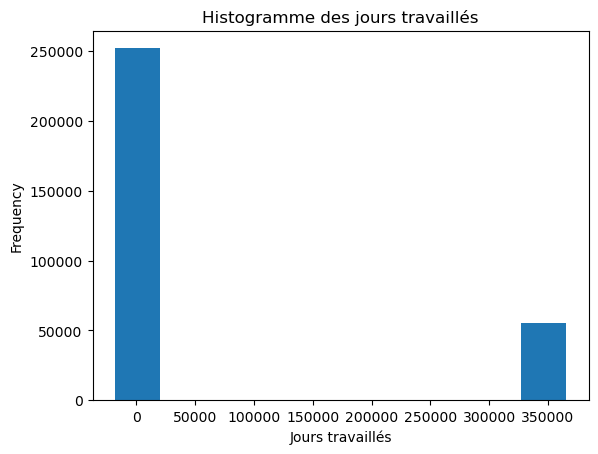

In [15]:
data_train['DAYS_EMPLOYED'].plot.hist(title = 'Histogramme des jours travaillés');
plt.xlabel('Jours travaillés');

In [16]:
anom = data_train[data_train['DAYS_EMPLOYED'] == 365243]
non_anom = data_train[data_train['DAYS_EMPLOYED'] != 365243]
print('Le défaut de non-anomalies  %0.2f%% de prêts' % (100 * non_anom['TARGET'].mean()))
print('Les anomalies par défaut %0.2f%% de prêts' % (100 * anom['TARGET'].mean()))
print('Il y a %d jours de travail anormaux' % len(anom))

Le défaut de non-anomalies  8.66% de prêts
Les anomalies par défaut 5.40% de prêts
Il y a 55374 jours de travail anormaux


In [17]:
data_test['DAYS_EMPLOYED_ANOM'] = data_test["DAYS_EMPLOYED"] == 365243
data_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('Il y a %d anomalies dans les données de test sur %d entries' % (data_test["DAYS_EMPLOYED_ANOM"].sum(), len(data_test)))

Il y a 9274 anomalies dans les données de test sur 48744 entries


### Corrélations

Maintenant que nous avons traité les variables catégorielles et les valeurs aberrantes, continuons avec l'EDA. Une façon d’essayer de comprendre les données consiste à rechercher des corrélations entre les caractéristiques et la cible. Nous pouvons calculer le coefficient de corrélation de Pearson entre chaque variable et la cible en utilisant la méthode dataframe .corr()

Le coefficient de corrélation n'est pas la meilleure méthode pour représenter la « pertinence » d'une caractéristique, mais il nous donne une idée des relations possibles au sein des données. Voici quelques interprétations générales de la valeur absolue du coefficient de corrélation :

- 00-.19 « très faible »

- 20-.39 «faible»

- 40-.59 « modéré »

- 60-.79 « fort »

- 80-1.0 "très fort


In [18]:
# Trouver des corrélations avec la cible et trier
correlations = data_train.corr()['TARGET'].sort_values()

# Display correlations
print('Corrélations les plus positives:\n', correlations.tail(5))
print('\nCorrélations les plus négatives:\n', correlations.head(5))

Corrélations les plus positives:
 NAME_INCOME_TYPE_Working       0.057481
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Corrélations les plus négatives:
 EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
Name: TARGET, dtype: float64


#### Les corrélations les plus significatives par rapport au TARGET sont : DAYS_BIRTH (corrélation positive)  EXT_SOURCE_3,  EXT_SOURCE_2 et  EXT_SOURCE_1 (corrélation negative)

#### Effet de l'âge sur le remboursement

In [19]:
data_train['DAYS_BIRTH'] = abs(data_train['DAYS_BIRTH'])
data_train['DAYS_BIRTH'].corr(data_train['TARGET'])

-0.07823930830982737

À mesure que le client vieillit, il existe une relation linéaire négative avec la cible, ce qui signifie qu’à mesure que les clients vieillissent, ils ont tendance à rembourser leurs prêts à temps.

Commençons par examiner cette variable. Tout d’abord, nous pouvons faire un histogramme de l’âge. Nous mettrons l'axe des x en années pour rendre l'intrigue un peu plus compréhensible.

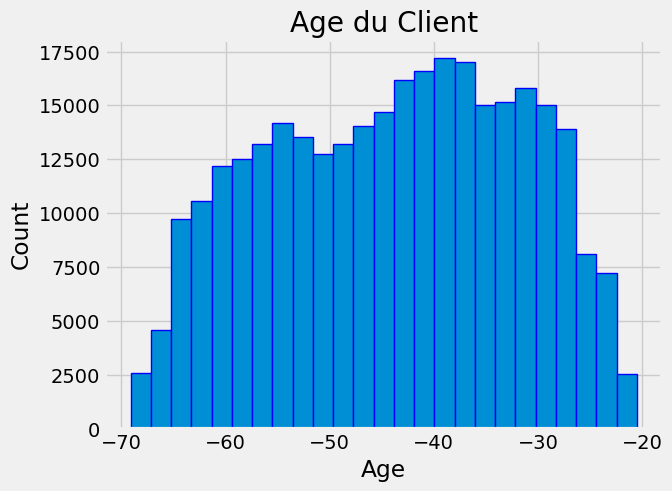

In [21]:
plt.style.use('fivethirtyeight')
# Tracer la répartition des âges en années
plt.hist(data_train['DAYS_BIRTH'] / -365,  edgecolor = 'b', bins = 25, linewidth=1)
plt.title('Age du Client'); plt.xlabel('Age'); plt.ylabel('Count');

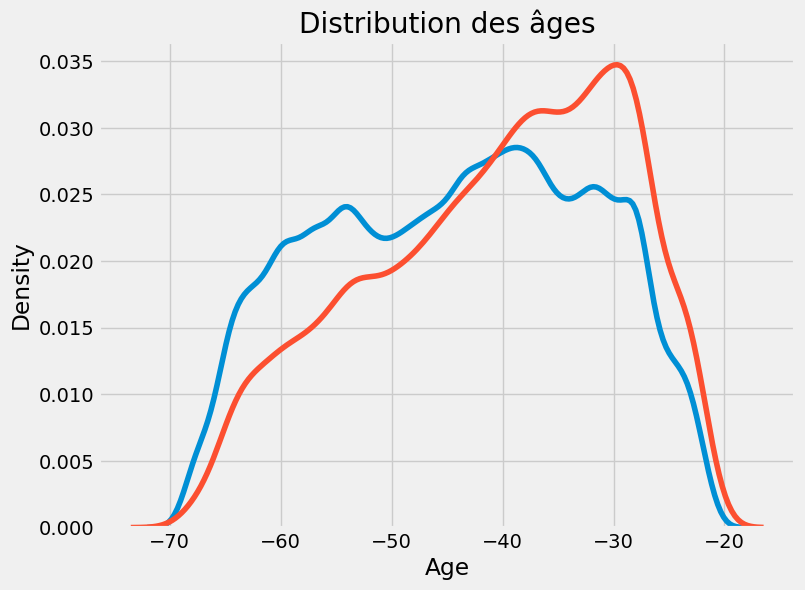

In [22]:
plt.figure(figsize = (8, 6))

# KDE plot of loans that were repaid on time
sns.kdeplot(data_train.loc[data_train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(data_train.loc[data_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age'); plt.ylabel('Density'); plt.title('Distribution des âges');

La courbe cible == 1 s’incline vers l’extrémité la plus jeune de la fourchette. Bien qu'il ne s'agisse pas d'une corrélation significative (coefficient de corrélation de -0,07), cette variable sera probablement utile dans un modèle d'apprentissage automatique car elle affecte la cible. Examinons cette relation sous un autre angle : non-remboursement moyen des prêts par tranche d'âge.

#### Sources extérieures

Les 3 variables présentant les corrélations négatives les plus fortes avec la cible sont EXT_SOURCE_1, EXT_SOURCE_2 et EXT_SOURCE_3. Selon la documentation, ces fonctionnalités représentent un « score normalisé provenant d'une source de données externe ». Je ne suis pas sûr de ce que cela signifie exactement, mais il peut s'agir d'une sorte de notation de crédit cumulative établie à l'aide de nombreuses sources de données.

Premièrement, nous pouvons montrer les corrélations des caractéristiques EXT_SOURCE avec la cible et entre elles.

In [26]:
# Extrayez les variables EXT_SOURCE et affichez les corrélations
ext_data = data_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


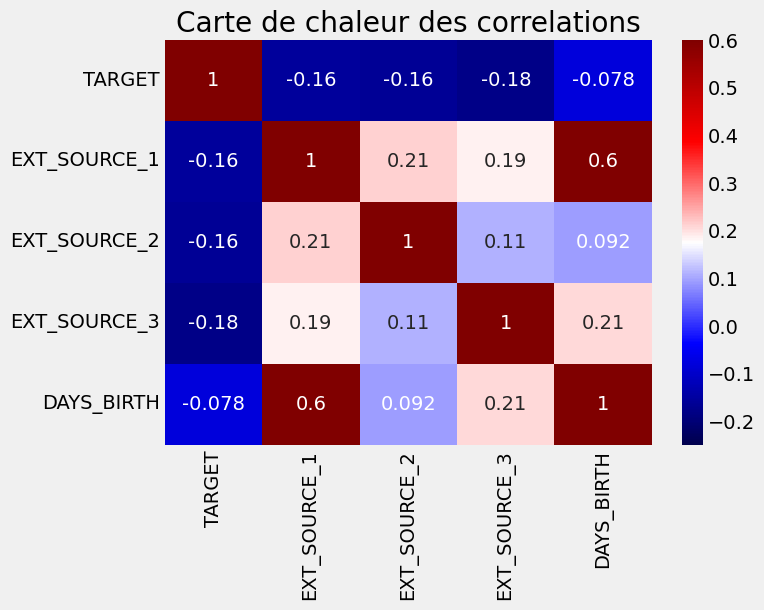

In [27]:
# Heatmap of correlations
plt.figure(figsize = (7, 5))
sns.heatmap(ext_data_corrs, cmap = plt.cm.seismic, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Carte de chaleur des correlations');

Les trois caractéristiques EXT_SOURCE ont des corrélations négatives avec la cible, ce qui indique qu'à mesure que la valeur de EXT_SOURCE augmente, le client est plus susceptible de rembourser le prêt. Nous pouvons également voir que DAYS_BIRTH est positivement corrélé avec EXT_SOURCE_1, ce qui indique que l'un des facteurs de ce score est peut-être l'âge du client.

Nous pouvons ensuite examiner la distribution de chacune de ces caractéristiques colorées par la valeur de la cible. Cela nous permettra de visualiser l'effet de cette variable sur la cible.

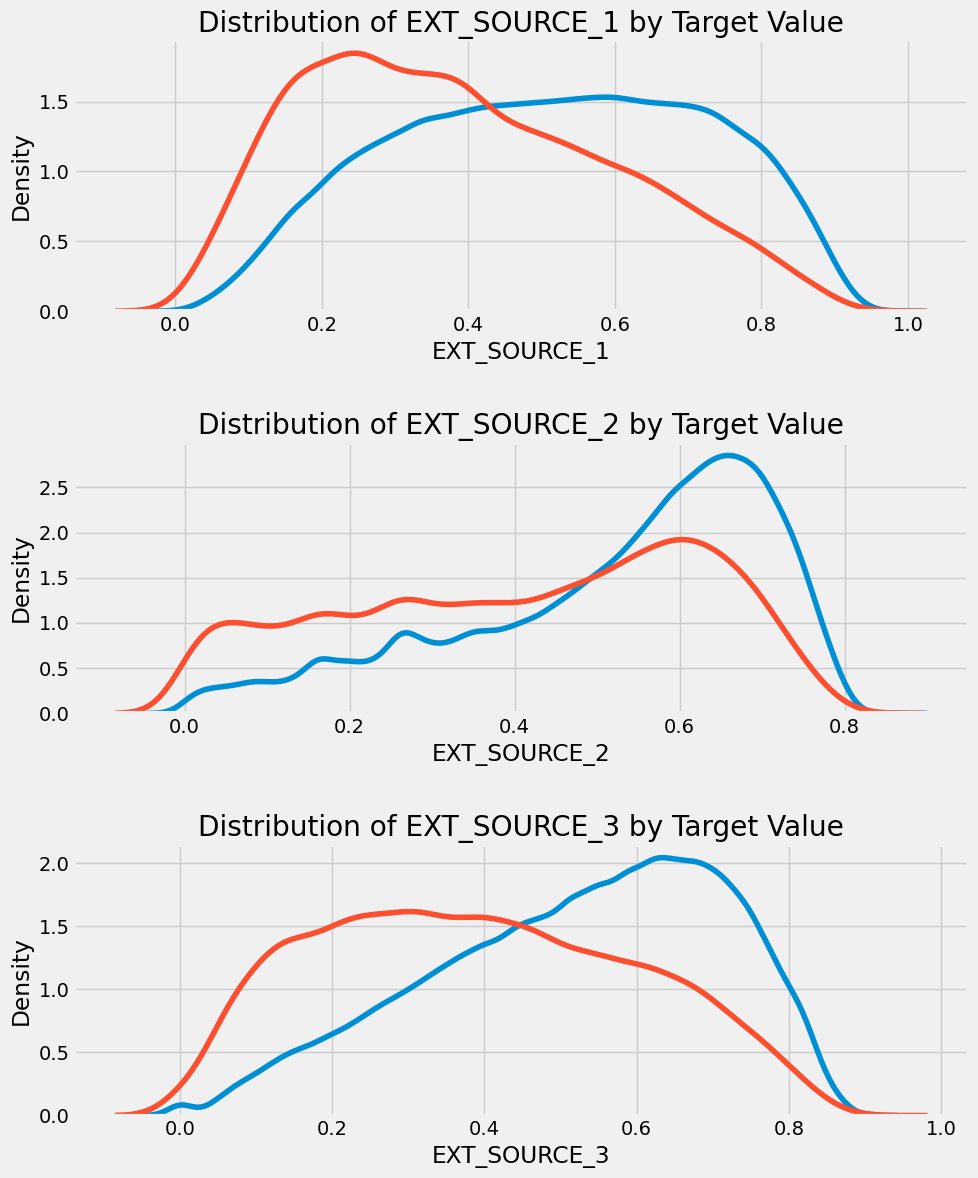

In [28]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    #prêts remboursés (orange)
    sns.kdeplot(data_train.loc[data_train['TARGET'] == 0, source], label = 'target == 0')
    # prêts non remboursés (bleu)
    sns.kdeplot(data_train.loc[data_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)
    

EXT_SOURCE_3 affiche la plus grande différence entre les valeurs de la cible. Nous pouvons clairement voir que cette caractéristique a un certain lien avec la probabilité qu'un demandeur rembourse un prêt. La relation n’est pas très forte (en fait, elles sont toutes considérées comme très faibles, mais ces variables seront tout de même utiles à un modèle d’apprentissage automatique pour prédire si un demandeur remboursera ou non un prêt à temps.

#### Pairs Plot

En guise de tracé exploratoire final, nous pouvons créer un tracé de paires des variables EXT_SOURCE et de la variable DAYS_BIRTH. Le diagramme de paires est un excellent outil d'exploration car il nous permet de voir les relations entre plusieurs paires de variables ainsi que les distributions de variables uniques. Ici, nous utilisons la bibliothèque de visualisation Seaborn et la fonction PairGrid pour créer un diagramme de paires avec des nuages ​​de points sur le triangle supérieur, des histogrammes sur la diagonale et des tracés de densité de noyau 2D et des coefficients de corrélation sur le triangle inférieur.


In [ ]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.Set3_r);

plt.suptitle("Tracé des paires de caractéristiques de source externe et d'âge", size = 32, y = 1.05);

Dans ce graphique, le rouge indique les prêts qui n’ont pas été remboursés et le bleu les prêts remboursés. Il semble y avoir une relation linéaire négative modérée entre TYPE_Revenu et YEARS_BIRTH d'une part et d'autre part Nbr_ENfant et YEARS_BIRTH indiquant que ces fonctionnalités peuvent prendre en compte l'âge du client.

## Feature Engineering

### Caractéristiques polynomiales

Créations des fonctionnalités qui sont des puissances de fonctionnalités existantes ainsi que des termes d'interaction entre fonctionnalités existantes. Ces caractéristiques qui sont une combinaison de plusieurs variables individuelles sont appelées termes d'interaction car elles capturent les interactions entre les variables. En d’autres termes, même si deux variables en elles-mêmes peuvent ne pas avoir une forte influence sur la cible, leur combinaison en une seule variable d’interaction peut révéler une relation avec la cible. Nous allons crééer des fonctionnalités polynomiales à l'aide des variables EXT_SOURCE et de la variable DAYS_BIRTH. 

In [56]:
# Créer une nouvelle dataframe pour les fonctionnalités polynomiales
poly_features = data_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = data_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer pour gérer les valeurs manquantes
from sklearn.impute import SimpleImputer 
Simpleimputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Nécessité d'imputer les valeurs manquantes"
poly_features = Simpleimputer.fit_transform(poly_features)
poly_features_test = Simpleimputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Créer l'objet polynomial avec le degré spécifié
poly_transformer = PolynomialFeatures(degree = 3)

In [57]:
# Entraîner les caractéristiques polynomiales
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)


Polynomial Features shape:  (307511, 35)


Cela crée un nombre considérable de nouvelles fonctionnalités. Pour obtenir les noms, nous devons utiliser la méthode get_feature_names des fonctionnalités polynomiales.

In [58]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

Il existe 35 fonctionnalités avec des fonctionnalités individuelles élevées à des puissances allant jusqu'au degré 3 et des termes d'interaction. Nous pouvons désormais voir si l’une de ces nouvelles fonctionnalités est corrélée à la cible.

In [59]:
# Créer un dataframe des fonctionnalités
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(10))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
EXT_SOURCE_3                             -0.155892
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.150822
Name: TARGET, dtype: float64
EXT_SOURCE_1 DAYS_BIRTH                 0.104882
EXT_SOURCE_3^2 DAYS_BIRTH               0.141777
EXT_SOURCE_2^2 DAYS_BIRTH               0.149313
EXT_SOURCE_3 DAYS_BIRTH                 0.150109
EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH    0.151816
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH    0.155891
EXT_SOURCE_2 DAYS_BIRTH                 0.156873
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH    0.181283
TARGET                                  1.000000
1                   

Plusieurs des nouvelles variables ont une corrélation plus grande (en termes d’ampleur absolue) avec la cible que les caractéristiques originales. Lorsque nous construisons des modèles d'apprentissage automatique, nous pouvons essayer avec et sans ces fonctionnalités pour déterminer si elles aident réellement le modèle à apprendre.


Nous ajouterons ces fonctionnalités à une copie des données de formation et de test, puis évaluerons les modèles avec et sans les fonctionnalités. Souvent, dans l’apprentissage automatique, la seule façon de savoir si une approche fonctionnera est de l’essayer !

In [65]:
# Mettre les fonctionnalités de test dans le dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))
# Fusionner les caractéristiques polynomiales dans la trame de données d'entraînement
poly_features['SK_ID_CURR'] = data_train['SK_ID_CURR']
app_train_poly = data_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Fusionner les fonctionnalités polnomiales dans la trame de données de test
poly_features_test['SK_ID_CURR'] = data_test['SK_ID_CURR']
app_test_poly = data_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
# Aligner les dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
# Imprimez les nouvelles formes
print("Les dimensions du dataframe d'entraînement avec des caractéristiques polynomiales :", app_train_poly.shape)
print('Les dimensions du dataframe de test avec des caractéristiques polynomiales : ', app_test_poly.shape)

Les dimensions du dataframe d'entraînement avec des caractéristiques polynomiales : (307511, 157)
Les dimensions du dataframe de test avec des caractéristiques polynomiales :  (48744, 157)


### Domain Knowledge Features (Fonctionnalités de connaissance du domaine)

CREDIT_INCOME_PERCENT : le pourcentage du montant du crédit par rapport aux revenus d'un client.

ANNUITY_INCOME_PERCENT : le pourcentage de la rente du prêt par rapport aux revenus d'un client.

CREDIT_TERM : la durée du versement en mois.
DAYS_EMPLOYED_PERCENT : le pourcentage de jour travaillé par rapport à l'âge du client

In [66]:
app_train_domain = data_train.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']
app_train_domain

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,1.0,False,2.007889,0.121978,0.060749,0.067329
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,False,4.790750,0.132217,0.027598,0.070862
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,False,2.000000,0.100000,0.050000,0.011814
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,False,2.316167,0.219900,0.094941,0.159905
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,False,4.222222,0.179963,0.042623,0.152418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,NaN,NaN,NaN,NaN,NaN,False,1.617143,0.174971,0.108198,0.025303
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,NaN,NaN,NaN,NaN,NaN,True,3.743750,0.166687,0.044524,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.0,0.0,1.0,0.0,1.0,False,4.429176,0.195941,0.044239,0.529266
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,0.0,False,2.164368,0.118158,0.054592,0.400134


In [67]:
app_test_domain = data_test.copy()
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']
app_test_domain

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0.0,0.0,0.0,0.0,0.0,False,4.213333,0.152300,0.036147,0.121044
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0.0,0.0,0.0,0.0,3.0,False,2.250182,0.175455,0.077973,0.247398
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0.0,0.0,0.0,1.0,4.0,False,3.275378,0.344578,0.105202,0.222477
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0.0,0.0,0.0,0.0,3.0,False,5.000000,0.155614,0.031123,0.133515
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,NaN,NaN,NaN,NaN,NaN,False,3.475000,0.178150,0.051266,0.168021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0.0,0.0,0.0,0.0,1.0,False,3.395556,0.143815,0.042354,0.258838
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,NaN,NaN,NaN,NaN,NaN,False,3.951829,0.202600,0.051267,0.102718
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0.0,0.0,0.0,3.0,1.0,False,1.555556,0.163978,0.105414,0.190742
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0.0,0.0,0.0,0.0,2.0,False,2.000000,0.111680,0.055840,0.195518


#### Après le nettoyage et l' analyse expolatoire des données, nous allons passé à la pahase de modelisation.